In [18]:
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np


x = sp.symbols('x')

# Find and Plot Abs and Rel Max-Min w/ roots

Insert function after f and interval

In [19]:
f = 5*x**3+2*x**2
start = -0.6
end = 0.4
f


5*x**3 + 2*x**2

Compute and print critical points:

In [20]:
domain = sp.Interval(start, end)

# Calculate the derivative
f_prime = sp.diff(f, x)

# Find the critical points and roots within the interval
critical_points = sp.solveset(f_prime, x, domain=domain)
roots = sp.solveset(f, x, domain=domain)
print("Roots:")
[print(root.evalf()) for root in roots]

# Calculate the second derivative
f_double_prime = sp.diff(f_prime, x)

# Classify the critical points
relative_extrema = {}
for point in critical_points:
    # Calculate the value of the second derivative at the critical point
    value = f_double_prime.subs(x, point)
    
    # If the second derivative is positive, the point is a relative min
    # If the second derivative is negative, the point is a relative max
    if value > 0:
        relative_extrema[point] = "relative min"
    elif value < 0:
        relative_extrema[point] = "relative max"

print("Relative Max:")
[print(point.evalf()) for point in critical_points if relative_extrema[point] == "relative max"]
print("Relative Min:")
[print(point.evalf()) for point in critical_points if relative_extrema[point] == "relative min"]


# Store relative maxima and minima points
relative_max_points = [point.evalf() for point in critical_points if relative_extrema[point] == "relative max"]
relative_min_points = [point.evalf() for point in critical_points if relative_extrema[point] == "relative min"]
roots_interval = [root.evalf() for root in roots]

# Convert symbolic values to floating point values
relative_max_points = [float(point) for point in relative_max_points]
relative_min_points = [float(point) for point in relative_min_points]
roots_interval = [float(root) for root in roots_interval]

# Ensure that near-zero values are exactly zero
relative_max_points = [0 if np.isclose(point, 0, atol=1e-10) else point for point in relative_max_points]
relative_min_points = [0 if np.isclose(point, 0, atol=1e-10) else point for point in relative_min_points]
roots_interval = [0 if np.isclose(point, 0, atol=1e-10) else point for point in roots_interval]

# Create arrays for plotting
f_lambdified = sp.lambdify(x, f, 'numpy')
x_vals = np.linspace(start, end, 1000)
y_vals = f_lambdified(x_vals)

# Calculate the absolute max and min
absolute_max_y = max(y_vals)
absolute_min_y = min(y_vals)
absolute_max_x = x_vals[y_vals.argmax()]
absolute_min_x = x_vals[y_vals.argmin()]
print("Absolute max:")
print(absolute_max_x)
print("Absolute min:")
print(absolute_min_x)



Roots:
-0.400000000000000
0
Relative Max:
-0.266666666666667
Relative Min:
0
Absolute max:
0.4
Absolute min:
-0.6


Graph Preparation

In [21]:
# Create arrays for plotting
f_lambdified = sp.lambdify(x, f, 'numpy')
x_vals = np.linspace(start, end, 1000)
y_vals = f_lambdified(x_vals)

# Calculate the absolute max and min
absolute_max_y = max(y_vals)
absolute_min_y = min(y_vals)
absolute_max_x = x_vals[y_vals.argmax()]
absolute_min_x = x_vals[y_vals.argmin()]

# Create arrays for the relative extrema and roots
relative_max_values = f_lambdified(np.array(relative_max_points))
relative_min_values = f_lambdified(np.array(relative_min_points))
roots_values = f_lambdified(np.array(roots_interval))

Plot

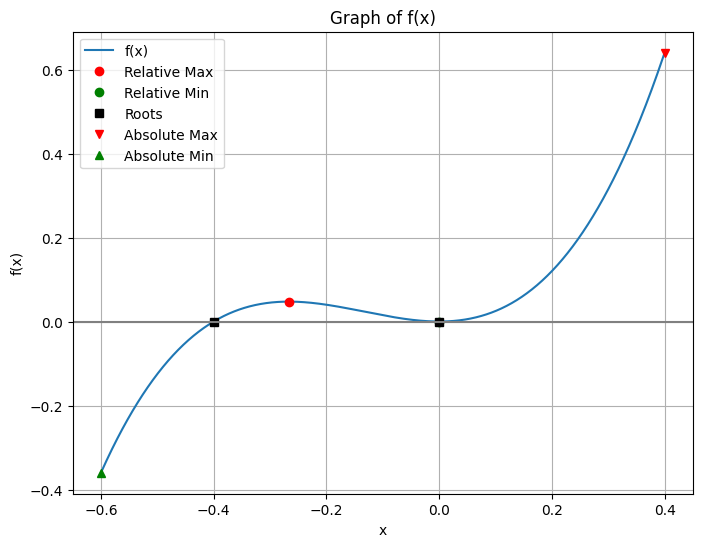

In [22]:

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(x_vals, y_vals, label='f(x)')
plt.plot(relative_max_points, relative_max_values, 'ro', label='Relative Max')
plt.plot(relative_min_points, relative_min_values, 'go', label='Relative Min')
plt.plot(roots_interval, roots_values, 'ks', label='Roots')
plt.plot(absolute_max_x, absolute_max_y, 'rv', label='Absolute Max')
plt.plot(absolute_min_x, absolute_min_y, 'g^', label='Absolute Min')
plt.title('Graph of f(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(loc='best')
plt.axhline(0, color='gray')
plt.grid(visible=True)
plt.show()